## Imports

In [1]:
import os
import networkx as nx
import numpy as np
import pandas as pd

## Part a. Numerical descriptors of networks

*    Number of nodes
*    Number of edges
*    Minimum, maximum and average degree
*    Average clustering coefficient (average of the clustering coefficient of each node)
*    Assortativity
*    Average path length (average distance between all pairs of nodes)
*    Diameter (maximum distance between nodes in the network)

In [2]:
model_files = ['./A1-networks/model/'+file for file in os.listdir('./A1-networks/model/')]
real_files = ['./A1-networks/real/'+file for file in os.listdir('./A1-networks/real/')]
toy_files = ['./A1-networks/toy/'+file for file in os.listdir('./A1-networks/toy/')]
total_files = model_files+real_files+toy_files

In [23]:
def part_a(files, outputcsv):
    results = pd.DataFrame(columns=['name', 'n_nodes', 'n_edges', 
                                    'min_degree','max_degree','avg_degree', 
                                    'clust','assort','avg_path','diam'])
    i = 0
    for file in files:
        print('Calculating '+file[14:])
        G = nx.read_pajek(file)
        graph = nx.Graph(G)
        n_nodes = G.number_of_nodes()
        n_edges = G.number_of_edges()
        degree = list(G.degree())
        min_degree = min([t[1] for t in degree])
        max_degree = max([t[1] for t in degree])
        avg_degree = np.round(np.mean([t[1] for t in degree]),4)
        clust = round(nx.average_clustering(graph),4)
        assort = round(nx.degree_assortativity_coefficient(G),4)
        avg_path = round(nx.average_shortest_path_length(G),4)
        diam = nx.diameter(G)
        filename = os.path.basename(file)[:-4]
        results.loc[i] = (filename,n_nodes,n_edges,min_degree,max_degree,avg_degree,clust,assort,avg_path,diam)
        i += 1
    results.to_csv(outputcsv)
    return results

In [24]:
%%time
results = part_a(total_files, 'part_a.csv')

Calculating model/SF_1000_g2.5.net
Calculating model/SF_1000_g2.7.net
Calculating model/homorand_N1000_K6_0.net
Calculating model/homorand_N1000_K4_0.net


/Users/elligalata/opt/anaconda3/lib/python3.7/site-packages/networkx/algorithms/assortativity/correlation.py:288: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / numpy.sqrt(vara * varb)


Calculating model/ER5000-kmed8.net
Calculating model/ER1000k8.net
Calculating model/SF_1000_g3.0.net
Calculating model/ws2000.net
Calculating model/BA1000.net
Calculating model/256_4_4_4_13_18_p.net
Calculating model/SF_500_g2.7.net
Calculating model/256_4_4_2_15_18_p.net
Calculating model/rb125.net
Calculating model/ws1000.net
Calculating real/zachary_unwh.net
Calculating real/dolphins.net
Calculating real/airports_UW.net
Calculating real/PGP.net
Calculating toy/rb25.net
Calculating toy/wheel.net
Calculating toy/graph3+1+3.net
Calculating toy/20x2+5x2.net
Calculating toy/graph3+2+3.net
Calculating toy/grid-p-6x6.net
Calculating toy/star.net
Calculating toy/circle9.net
CPU times: user 33min 43s, sys: 14.8 s, total: 33min 58s
Wall time: 34min 53s


In [25]:
results

,name,n_nodes,n_edges,min_degree,max_degree,avg_degree,clust,assort,avg_path,diam
0,SF_1000_g2.5,1000,1905,2,30,3.8100,0.0096,0.0200,4.6149,10
1,SF_1000_g2.7,1000,1668,2,24,3.3360,0.0067,-0.0020,5.4688,12
2,homorand_N1000_K6_0,1000,2994,5,6,5.9880,0.0038,0.1919,4.1913,6
3,homorand_N1000_K4_0,1000,2000,4,4,4.0000,0.0020,NaN,5.6400,9
4,ER5000-kmed8,5000,19980,4,17,7.9920,0.0014,-0.0555,4.3797,6
5,ER1000k8,1000,3956,1,17,7.9120,0.0080,-0.0168,3.5698,6
6,SF_1000_g3.0,1000,1517,2,26,3.0340,0.0052,-0.0085,5.9651,13
7,ws2000,2000,6000,3,13,6.0000,0.0033,-0.0762,4.5111,7
8,BA1000,1000,3990,4,115,7.9800,0.0354,-0.0542,3.1833,5
9,256_4_4_4_13_18_p,256,4598,20,50,35.9219,0.5113,0.0007,2.6511,4


## Part b. Numerical descriptors of the nodes of the network real/airports_UW.net 

* Degree
* Strength - Node strength is the sum of weights of links connected to the node.
* Clustering coefficient
* Average path length (average distance to the rest of the nodes)
* Maximum path length (maximum distance to the rest of the nodes)
* Betweenness
* Eigenvector centrality
* PageRank

In [6]:
def part_b(net_path, nodes, outputcsv):
    results = pd.DataFrame(columns=['node', 'degree', 'strength', 
                                    'clust','avg_path_length','max_path_length',
                                    'betweenness','eigenvect_centr','pagerank'])
    G = nx.Graph(nx.read_pajek(net_path))
    betweenness = nx.betweenness_centrality(G)
    ev_centr = nx.eigenvector_centrality(G)
    pagerank = nx.pagerank(G)
    i = 0
    for node in nodes:
        degree = G.degree[node]
        strength = G.degree(weight='weight')[node]
        clust = round(nx.clustering(G,node),4)
        paths = nx.shortest_path_length(G,source=node)
        avg_path_l = round(np.mean([paths[k] for k in paths if k!=node]),4)
        max_path_l = max([paths[k] for k in paths])
        between = round(betweenness[node],4)
        ev_centrality = round(ev_centr[node],4)
        pr = round(pagerank[node],4)
        results.loc[i] = (node,degree,strength,clust,avg_path_l,max_path_l,between,ev_centrality,pr)
        i += 1
    results.to_csv(outputcsv)
    return results

In [7]:
net_path = './A1-networks/real/airports_UW.net'

In [8]:
nodes = ['PAR', 'LON', 'FRA', 'AMS', 'MOW', 'CHI', 'NYC', 'ATL', 'BCN', 'CAN', 'CHC', 'DJE', 'ADA', 'AGU', 'TBO', 'ZVA']
nodes = np.sort(nodes)

In [9]:
%%time 
part_b(net_path, nodes, 'part_b.csv')

CPU times: user 1min 4s, sys: 375 ms, total: 1min 5s
Wall time: 1min 9s


,node,degree,strength,clust,avg_path_length,max_path_length,betweenness,eigenvect_centr,pagerank
0,ADA,7,10704.0,0.7143,3.6334,11,0.0000,0.0107,0.0002
1,AGU,7,7678.0,0.7619,3.6655,11,0.0000,0.0051,0.0001
2,AMS,192,481335.0,0.1428,2.7321,10,0.0405,0.1715,0.0054
3,ATL,172,1129605.0,0.1378,2.9162,11,0.0249,0.1221,0.0086
4,BCN,80,289105.0,0.3285,3.2740,11,0.0019,0.0891,0.0028
5,CAN,80,204848.0,0.1712,3.3166,10,0.0076,0.0153,0.0028
6,CHC,20,64158.5,0.2526,3.5662,10,0.0034,0.0042,0.0016
7,CHI,184,1329505.0,0.1342,2.8087,11,0.0444,0.1381,0.0102
8,DJE,20,10198.5,0.7000,3.5792,11,0.0001,0.0318,0.0002
9,FRA,237,697513.5,0.1170,2.6829,10,0.0656,0.1955,0.0077


## Part c. Plot the degree distributions (PDF, probability distribution function) and the complementary cumulative degree distributions (CCDF, complementary cumulative distribution function) for the following networks:

*    model/ER1000k8.net
*    model/SF_1000_g2.7.net
*    model/ws1000.net
*    real/airports_UW.net

In [43]:
import matplotlib.pyplot as plt
from scipy.stats import iqr
import os
import seaborn as sns

PATH = 'A1-networks'
network_paths = ['model/ER1000k8.net', 'model/SF_1000_g2.7.net', 'model/ws1000.net', 'real/airports_UW.net']
paths = [os.path.join(PATH, t) for t in network_paths]

final_results = {}
for i in paths:
    filename = os.path.basename(i)[:-4]
    
    G = nx.Graph(nx.read_pajek(i))

    n_nodes = G.number_of_nodes()
    deg = list(nx.degree(G))
    node_indexes, node_degrees = zip(*deg)
    log_node_degrees = np.log(node_degrees)

    n_bins = len(set(node_degrees))
    n_bins = int(np.ceil(6 * np.log(n_bins)))

    df = pd.DataFrame({'degrees': node_degrees})
    df['bins'] = pd.qcut(df['degrees'], int(n_bins), duplicates='drop')
    records = df.groupby('bins')['degrees'].count().reset_index(name='Count').to_dict(orient='records')

    mid = [(record['bins'].left + record['bins'].right) / 2 for record in records]
    labels = [(np.round(record['bins'].left), np.round(record['bins'].right)) for record in records]

    mid_labels = [str(int(t)) + ' - ' + str(int(y)) for t, y in labels]
    # mid = [int(np.round(np.exp(m))) for m in mid]

    probablities = [np.round(record['Count'] / n_nodes,5) for record in records]

    cum = np.cumsum(probablities[::-1])[::-1]
    cum_power_law = pd.DataFrame({'probabilities': cum, 'degrees': mid_labels})
    power_law = pd.DataFrame({'probabilities': probablities, 'degrees': mid_labels})
    final_results[filename] = (power_law, cum_power_law)
    results = pd.DataFrame({})
    results['Degrees'] = cum_power_law['degrees']
    results['Count'] = [record['Count'] for record in records]
    results['PDF'] = power_law['probabilities']
    results['CCDF'] = cum_power_law['probabilities']

    results.to_csv(filename + '_powerlaw.csv', index=False)


### Plot Functions

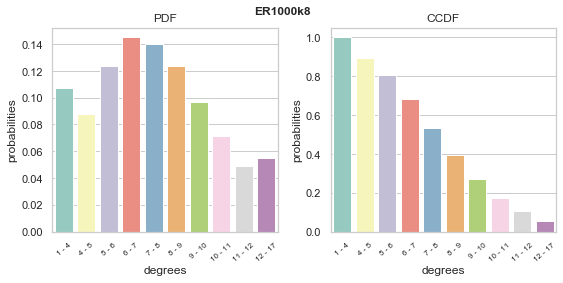

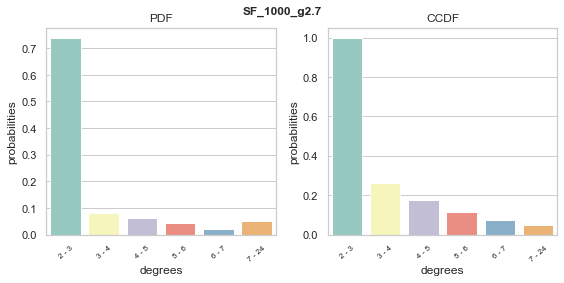

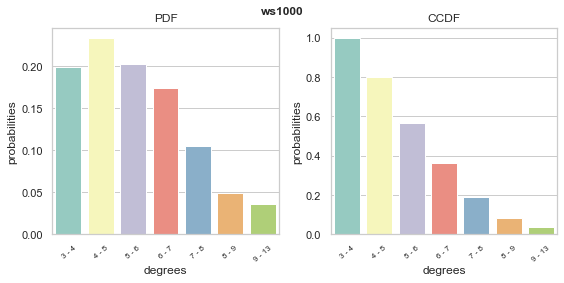

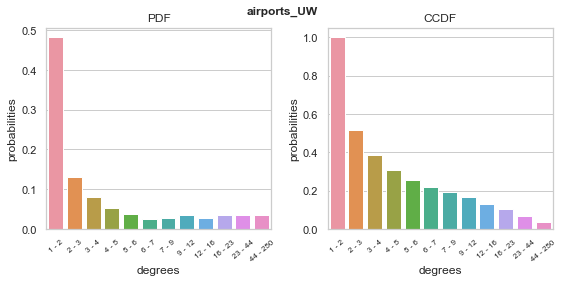

In [45]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff*0.9 )

        
sns.set()
np.random.seed(0)
sns.set(style="whitegrid")
sns.set_palette("Set3", 10)


# Divide the figure into a 2x1 grid, and give me the second section


for i in range(len(paths)):
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    filename = os.path.basename(paths[i])[:-4]
    fig.suptitle(filename, fontsize=12, fontweight='bold')
    power_law, cum_power_law = final_results[filename]
    change_width(axes[0], 1.0)
    change_width(axes[1], 1.0)
    sns.barplot(x="degrees", y="probabilities", data=power_law, ax=axes[0]).set_title('PDF')
    sns.barplot(x="degrees", y="probabilities", data=cum_power_law, ax=axes[1]).set_title('CCDF')
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=40, ha="center", fontsize=8)
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=40, ha="center", fontsize=8)

    fig.tight_layout()
    path = os.path.join('images', filename + '.png')
    plt.savefig(path)


